In [1]:
import gdal
import osr
import cartopy
import matplotlib.pyplot as plt

**Use the ```gdal``` package to open a GeoTIFF file.**  
The default type is an [osgeo.gdal.Dataset](https://gdal.org/python/osgeo.gdal.Dataset-class.html):

In [2]:
ndvi_ds = gdal.Open('../data/satellite-data/avhrr-ndvi-geotif/av_TOTND2013v4.tif')
print(ndvi_ds.RasterCount, ndvi_ds.RasterYSize, ndvi_ds.RasterXSize)

1 2889 4587


In [3]:
type(ndvi_ds)

osgeo.gdal.Dataset

**Pull out data as an array using the ```.ReadAsArra()``` method:**

In [4]:
ndvi_data = ndvi_ds.ReadAsArray()

**Use the ```imshow()``` function to view it:**

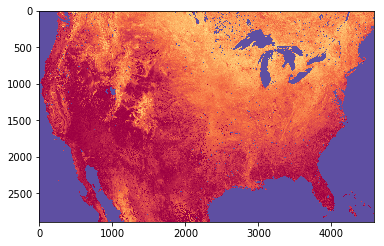

In [5]:
plt.imshow(ndvi_data, cmap='Spectral', origin='upper')

**Use the ```.GetProjection()``` method to get projection information of the file.**  
We can see that it's a Lambert Azimuthal Equal Area, and the center latitudes and longitude, as well as its datum and easting/northing information, are all available here

In [6]:
ndvi_proj = ndvi_ds.GetProjection()
print(ndvi_proj)

PROJCS["LAEA_Sphere_19",GEOGCS["GCS_unknown",DATUM["unknown",SPHEROID["Sphere",6370997,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",45],PARAMETER["longitude_of_center",-100],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


**Use the ```.GetGeoTransform()``` method to get info about where on the globe the image starts, as well as the widths and heights of the pixels:**

In [7]:
ndvi_geotransform = ndvi_ds.GetGeoTransform()
print(ndvi_geotransform)

(-2050500.0, 1000.0, 0.0, 752500.0, 0.0, -1000.0)


#### Results from GetGeoTransform() are:

    [0] top left x
    [1] pixel width (west-east)
    [2] rotation, 0 if image is "north up"
    [3] top left y
    [4] rotation, 0 if image is "north up"
    [5] pixel height (north-south)

**Set some variables for easier use later:**

In [8]:
origin_x = ndvi_geotransform[0]
origin_y = ndvi_geotransform[3]
pixel_width = ndvi_geotransform[1]
pixel_height = ndvi_geotransform[5]

corner_x = origin_x + pixel_width*ndvi_ds.RasterXSize
corner_y = origin_y + pixel_height*ndvi_ds.RasterYSize

**Use cartopy to create the coordinate reference systems.**

For satellite data like GeoTIFF files, the projection is often on an ellipsoid, **not** a perfect sphere.  To correctly specify this, you'll need to use a ```cartopy.crs.Globe()``` object in the projection definition.  Below, the variable ```avhrr_globe``` has been specified using the ```semimajor_axis``` keyword.

In [9]:
avhrr_globe = cartopy.crs.Globe(datum='WGS84', ellipse='sphere', semimajor_axis=6370997.0)

data_crs = cartopy.crs.LambertAzimuthalEqualArea(central_longitude=-100.,
                                                 central_latitude=45.,
                                                 false_easting=0.,
                                                 false_northing=0.,
                                                 globe=avhrr_globe)

**It's also important to specify the exact extent, in the coordinates of the original data, of the rectangular grid:**

In [10]:
data_extent = (ndvi_geotransform[0],
               ndvi_geotransform[0] + ndvi_ds.RasterXSize*ndvi_geotransform[1],
               ndvi_geotransform[3] + ndvi_ds.RasterYSize*ndvi_geotransform[5],
               ndvi_geotransform[3])

**Add ```data_extent``` to the ```imshow()``` function to ensure this is incorporated:**

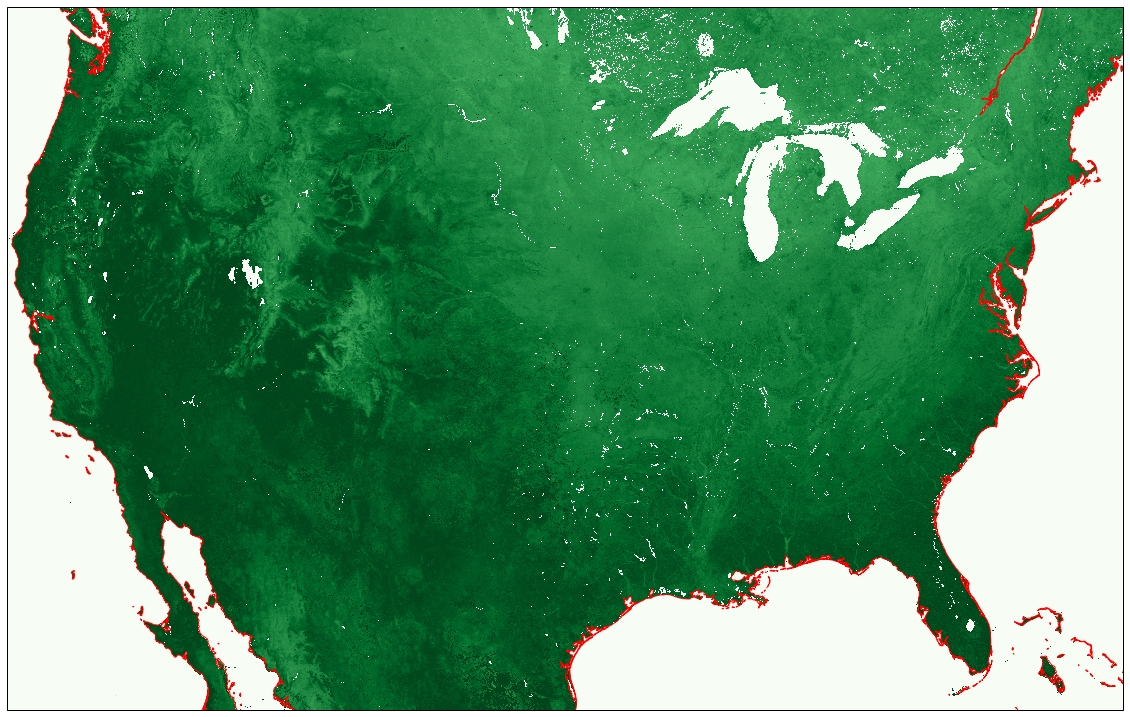

In [11]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection=data_crs)

ax.imshow(ndvi_data, origin='upper', extent=data_extent, transform=data_crs, cmap='Greens_r')
ax.coastlines(resolution='10m', color='red')

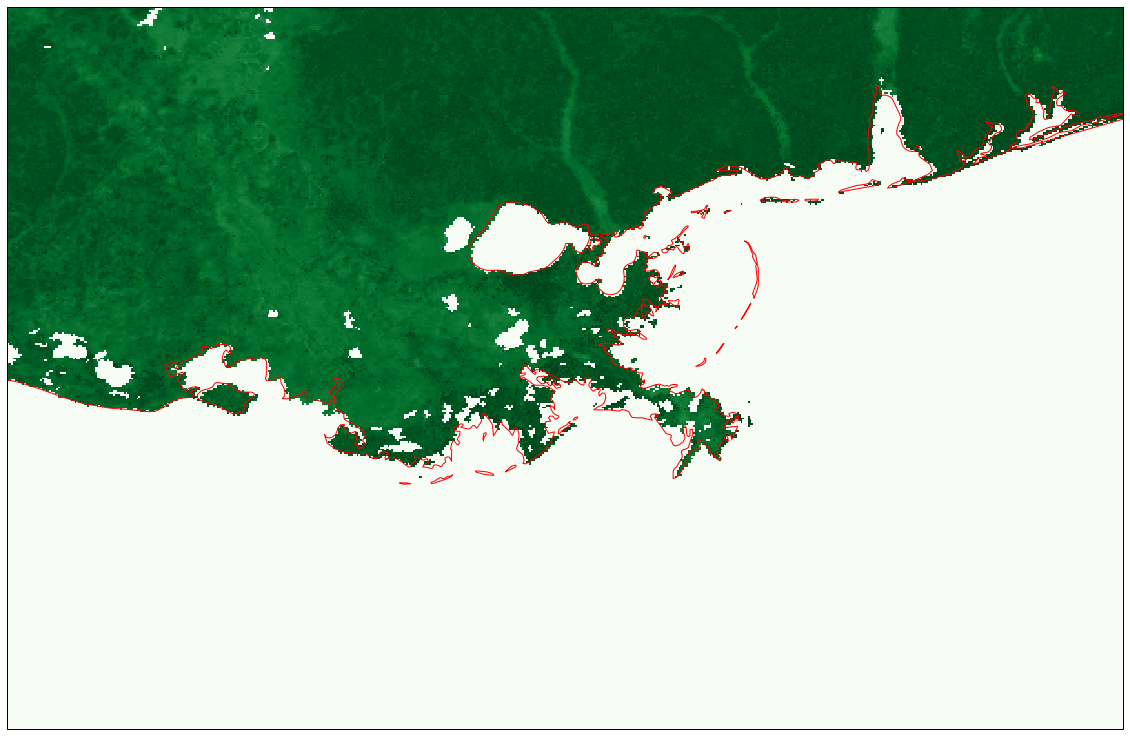

In [12]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection=data_crs)

ax.imshow(ndvi_data, origin='upper', extent=data_extent, transform=data_crs, cmap='Greens_r')
ax.coastlines(resolution='10m', color='red')

ax.set_extent([267,273,28,31], crs=cartopy.crs.PlateCarree())